In [1]:
# https://www.geeksforgeeks.org/deep-learning/implementing-an-autoencoder-in-pytorch/

import torch
from torch import nn, optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

from ViT import ViTEncoder, ViTDecoder, AutoEncoder

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(), 
])

dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

In [3]:
autoencoder = AutoEncoder(img_size=28, patch_size=4, num_of_channels=1, 
                     embed_dim=16, enc_depth=4, dec_depth=2, num_heads=2, mlp_dim=64)      

In [5]:
loss_function = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=1e-3, weight_decay=1e-8)
loader = torch.utils.data.DataLoader(dataset=dataset, batch_size=32, shuffle=True)

epochs = 20
outputs = []
losses = []

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
autoencoder.to(device)
autoencoder.train()

for epoch in range(epochs):
    running_loss = 0.0
    for images, _ in loader:
        images = images.to(device)
        
        reconstructed = autoencoder(images)
        loss = loss_function(reconstructed, images)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    avg_loss = running_loss / len(loader)
    losses.append(avg_loss)
    
    outputs.append((epoch, images, reconstructed))
    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss.item():.6f}")


tensor([[[ 1.0130, -0.7128, -1.6492,  ..., -0.9438, -1.1299,  0.3435],
         [ 0.9122, -0.9275, -1.6824,  ..., -1.0429, -1.0365,  0.2612],
         [ 0.8761, -0.7590, -1.7346,  ..., -1.2178, -0.7515, -0.0723],
         ...,
         [ 0.9448, -0.6262, -1.8380,  ..., -1.1436, -1.1829,  0.3236],
         [ 1.0720, -0.5827, -1.7140,  ..., -1.1351, -1.0436,  0.0286],
         [ 0.8538, -0.8071, -1.4953,  ..., -1.2052, -0.6569,  0.1443]],

        [[ 1.0782, -0.6230, -1.5256,  ..., -1.4288, -0.9957,  0.2224],
         [ 1.0333, -0.9579, -1.7297,  ..., -1.0672, -0.6433,  0.1722],
         [ 0.9581, -0.7581, -1.5578,  ..., -1.2057, -0.9731,  0.1077],
         ...,
         [ 0.6619, -0.9816, -1.5337,  ..., -1.1810, -0.9286,  0.4050],
         [ 0.9833, -0.9577, -1.3991,  ..., -1.0055, -1.2960,  0.0708],
         [ 0.8642, -0.7649, -1.6432,  ..., -1.2099, -1.1059,  0.3644]],

        [[ 0.7930, -0.3515, -1.7569,  ..., -1.1754, -1.0867,  0.1956],
         [ 1.1340, -0.8216, -1.5357,  ..., -1

KeyboardInterrupt: 

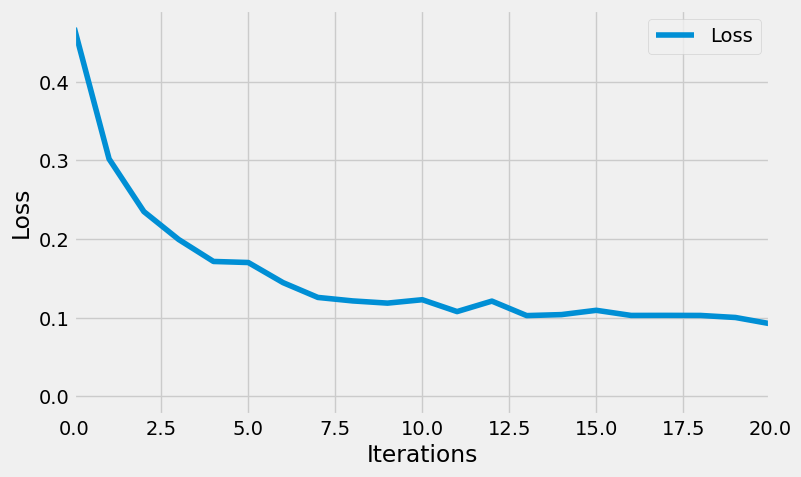

In [54]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8, 5))
plt.plot(losses, label='Loss')
plt.xlabel('Iterations')
plt.xlim([0, epochs])
plt.ylabel('Loss')
plt.legend()
plt.show()

In [50]:
type(dataset[0])

tuple

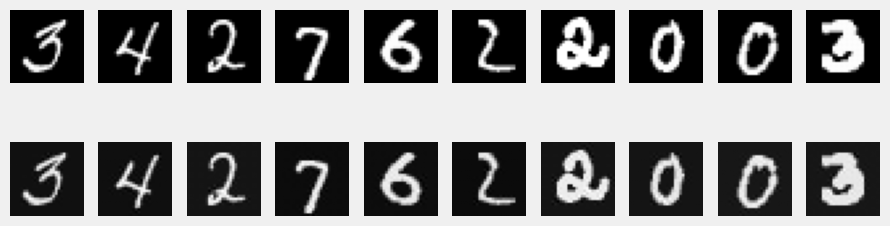

In [53]:
autoencoder.eval()
dataiter = iter(loader)
images, _ = next(dataiter)

images = images.to(device)
reconstructed = autoencoder(images)

fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(10, 3))
for i in range(10):
    axes[0, i].imshow(images[i].cpu().detach().numpy().reshape(28, 28), cmap='gray')
    axes[0, i].axis('off')
    axes[1, i].imshow(reconstructed[i].cpu().detach().numpy().reshape(28, 28), cmap='gray')
    axes[1, i].axis('off')
plt.show()